<a href="https://colab.research.google.com/github/Viswanathan25/Retail_sales_final-Project/blob/main/F_ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
df = pd.read_csv('D:/DS/Project/Retail Sales Final-Project-main/Cleaned_Dataset.csv')
df

,Day,Month,Year,Store,Dept,Type,IsHoliday,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,0,24924.5000,151315,42.31,2.572,10388.4998,3579.21,141.4382,32403.87,6251.1456,211.096358,8.106
1,5,2,2010,1,2,1,0,50605.2700,151315,42.31,2.572,10388.4998,3579.21,141.4382,32403.87,6251.1456,211.096358,8.106
2,5,2,2010,1,3,1,0,13740.1200,151315,42.31,2.572,10388.4998,3579.21,141.4382,32403.87,6251.1456,211.096358,8.106
3,5,2,2010,1,4,1,0,39954.0400,151315,42.31,2.572,10388.4998,3579.21,141.4382,32403.87,6251.1456,211.096358,8.106
4,5,2,2010,1,5,1,0,32229.3800,151315,42.31,2.572,10388.4998,3579.21,141.4382,32403.87,6251.1456,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,0,3606.7554,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.5700,193.589304,8.684
551475,26,7,2013,45,95,2,0,60064.1619,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.5700,193.589304,8.684
551476,26,7,2013,45,96,2,0,14.6785,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.5700,193.589304,8.684
551477,26,7,2013,45,97,2,0,7290.2984,118221,76.06,3.804,212.0200,851.73,4.7000,10.88,1864.5700,193.589304,8.684


In [4]:
#model prediction
#x = df[['Day','Month','Year','Store','Dept','Type','IsHoliday','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']]
x = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']

In [5]:
x.shape,y.shape

((551479, 17), (551479,))

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(xtrain,ytrain)

y_pre_train = model.predict(xtrain)
y_pre_test = model.predict(xtest)

#r2 score prediction
r2_train = r2_score(ytrain, y_pre_train)
r2_test = r2_score(ytest, y_pre_test)

print(f'Training_r2_score: {r2_train}, Testing_r2_score: {r2_test}')

Training_r2_score: 0.997278768638244, Testing_r2_score: 0.9800303160872817


In [7]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [7]:
#Prediction Test
# x = df.drop('Weekly_Sales',axis=1)
# y = df['Weekly_Sales']

In [8]:
x.loc[2].tolist()

[5.0,
 2.0,
 2010.0,
 1.0,
 3.0,
 1.0,
 0.0,
 151315.0,
 42.31,
 2.572,
 10388.499800000012,
 3579.210000000004,
 141.43820000000022,
 32403.870000000075,
 6251.145600000007,
 211.0963582,
 8.106]

In [9]:
y.loc[2].tolist()

13740.12

In [12]:
predicted = model.predict([x.loc[2].tolist()])
predicted[0]

12809.686600000008

In [11]:
y.loc[5000]

1434.73

In [14]:
predicted = model.predict([x.loc[5000].tolist()])

predicted[0]

1217.2736999999997

**Testing the Weekly_Sales**

In [15]:
df1 = df.copy()
df1.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'IsHoliday',
       'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [16]:
x = df1.drop(['Weekly_Sales','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1)
y = df1['Weekly_Sales']

In [17]:
x.shape,y.shape

((551479, 12), (551479,))

In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor().fit(xtrain,ytrain)

y_pre_train = model.predict(xtrain)
y_pre_test = model.predict(xtest)

#r2 score prediction
r2_train = r2_score(ytrain, y_pre_train)
r2_test = r2_score(ytest, y_pre_test)

print(f'Training_r2_score: {r2_train}, Testing_r2_score: {r2_test}')

Training_r2_score: 0.9976743263773558, Testing_r2_score: 0.9835055781513641


In [22]:
x.loc[5000].tolist()

[12.0,
 2.0,
 2010.0,
 30.0,
 16.0,
 3.0,
 1.0,
 42988.0,
 37.77,
 2.548,
 210.8979935,
 8.324]

In [23]:
y.loc[5000].tolist()

1434.73

In [24]:
predicted = model.predict([x.loc[5000].tolist()])

predicted[0]

1390.5610999999997

# **Saving the model**

In [20]:
import pickle
with open('F_regression.pkl', 'wb') as f:
    pickle.dump(model, f)

## **Effects of Markdown on Holiday weeks**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn

In [26]:
df1.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'IsHoliday',
       'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

**Linear Relationship**

***Correlation***

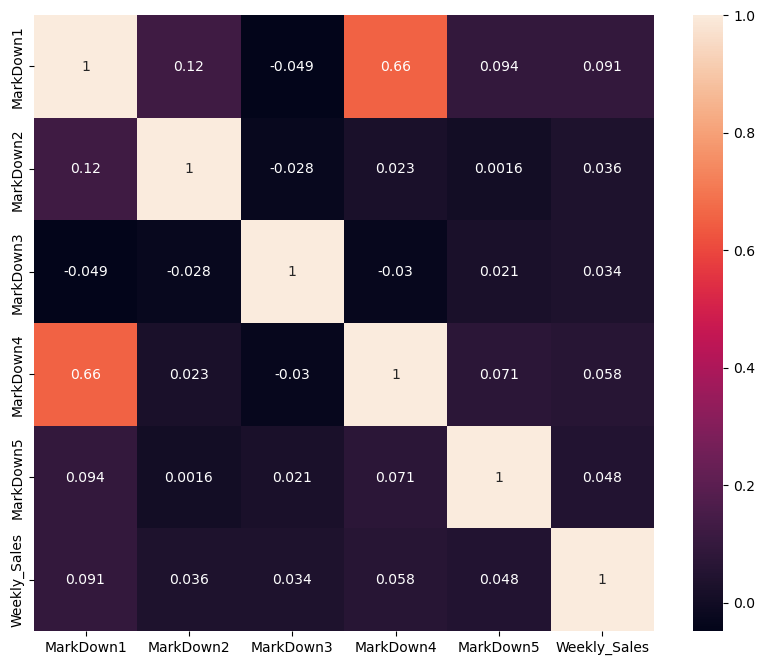

In [27]:
plt.figure(figsize=(10,8))
x = df1[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Weekly_Sales']]
sn.heatmap(x.corr(),annot=True)
plt.show()

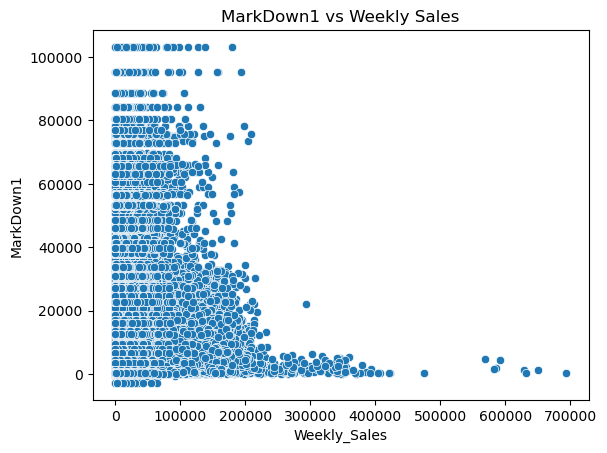

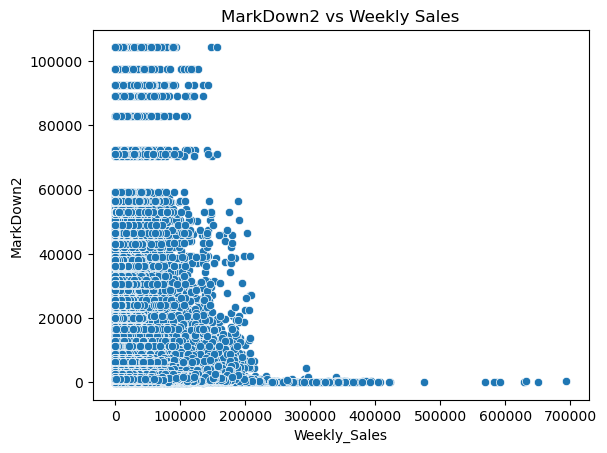

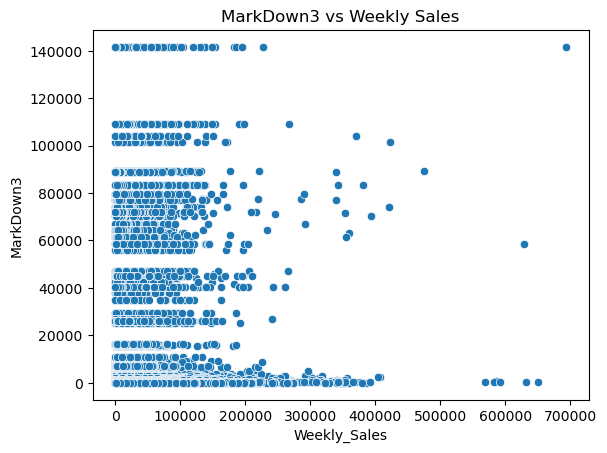

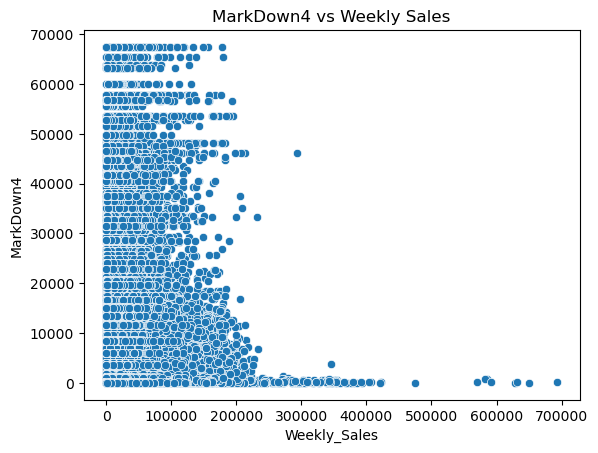

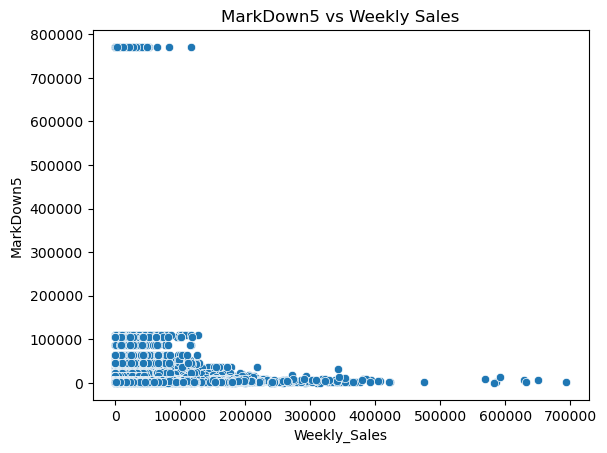

In [28]:
#Non linear
def scatter(columns):
  for i in columns:
    sn.scatterplot(data=df1,x='Weekly_Sales',y=i)
    plt.title(f'{i} vs Weekly Sales')
    print()
    plt.show()

scatter(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

**Right Skewed we use log conversion**

In [30]:
import numpy as np
def log_transformation(columns):
  for i in columns:
    df1[i] = np.log(df1[i])
log_transformation(['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

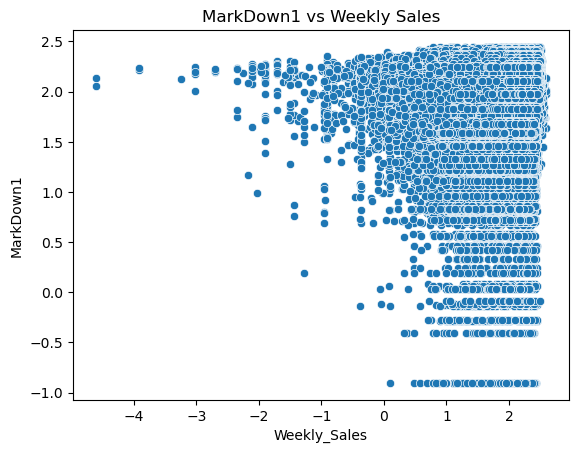

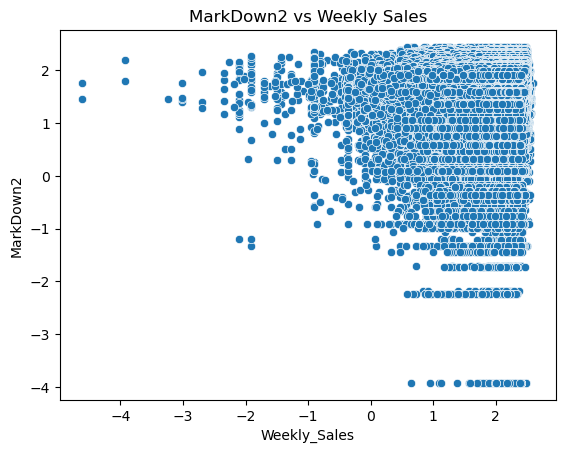

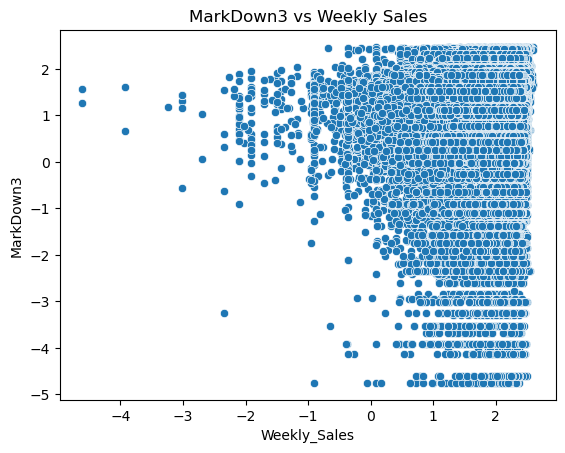

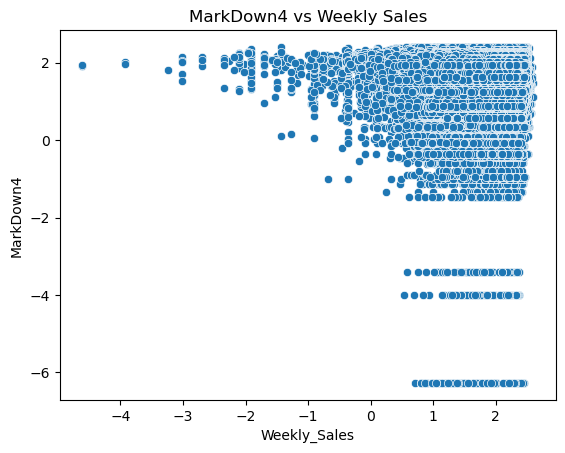

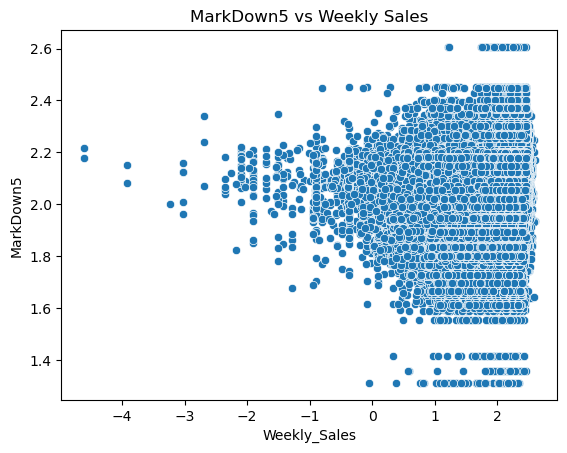

In [31]:
def scatter(columns):
  for i in columns:
    sn.scatterplot(data=df1,x='Weekly_Sales',y=i)
    plt.title(f'{i} vs Weekly Sales')
    print()
    plt.show()

scatter(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

**Skewnees Correlation**

**Before Treating Skewness**

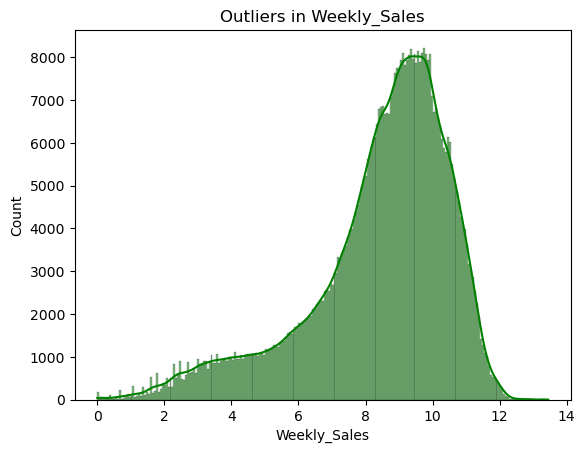

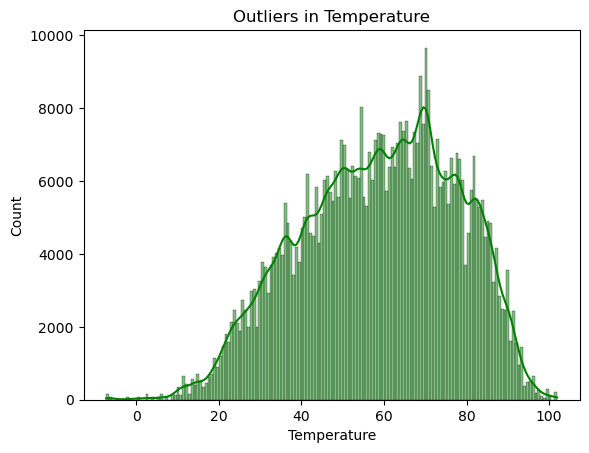

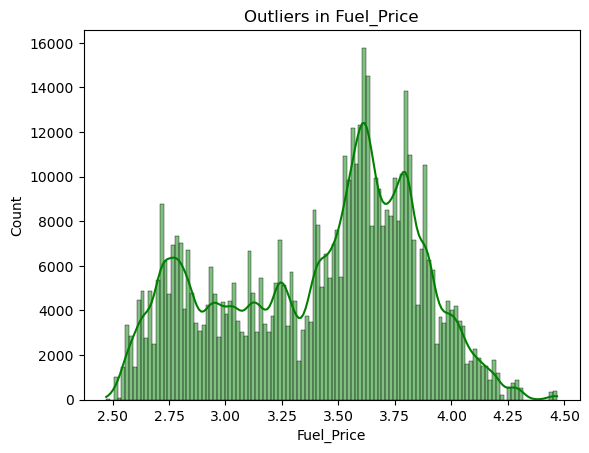

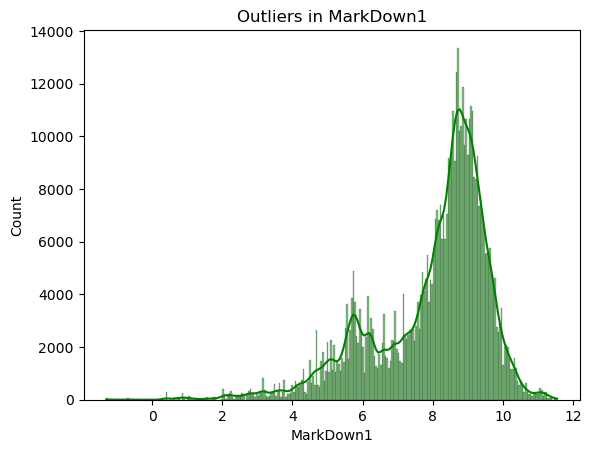

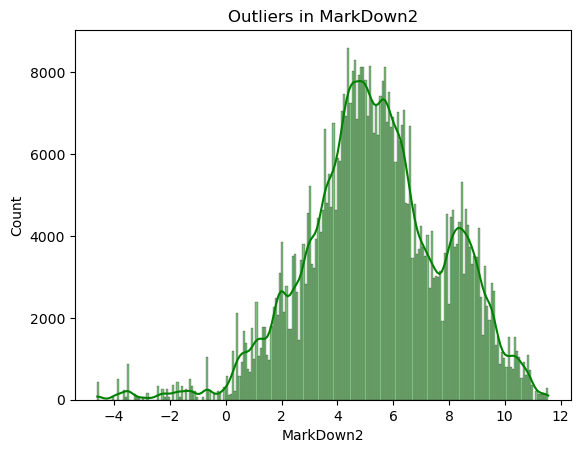

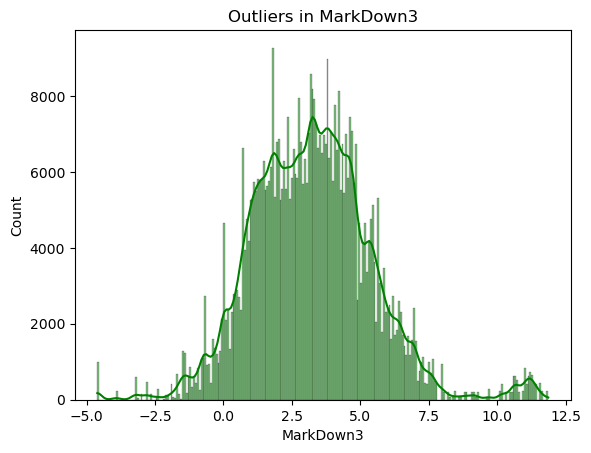

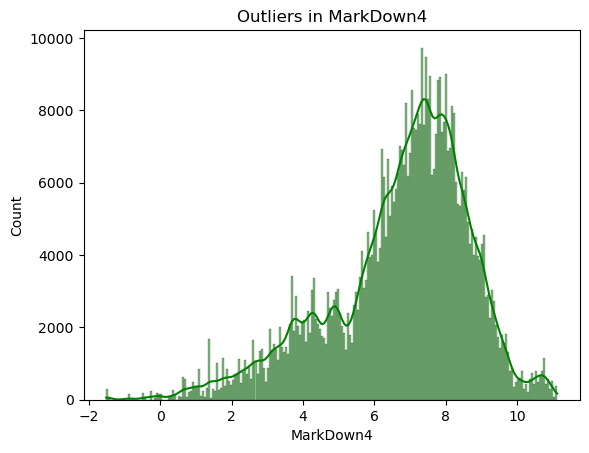

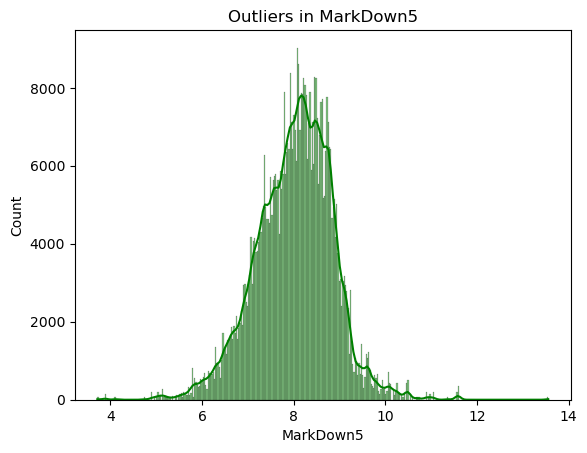

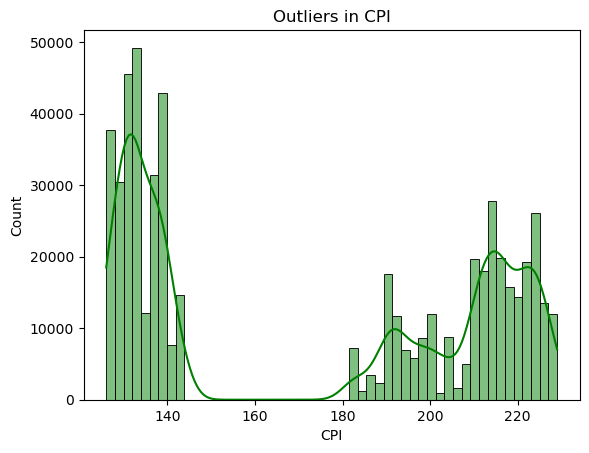

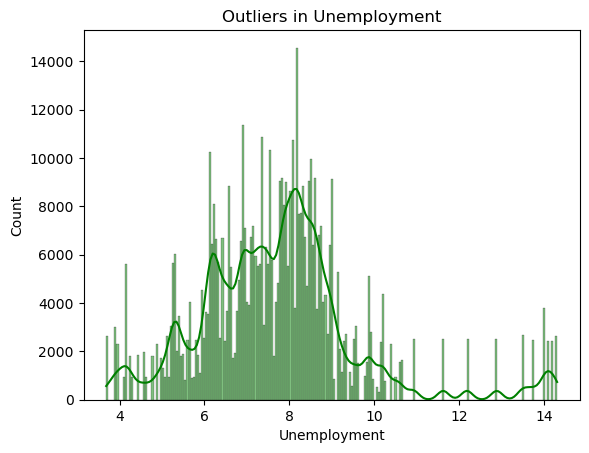

In [27]:
def visuals(columns):
  for i in columns:
    sn.histplot(data=df1,x=i,color='g',kde=True)
    plt.title(f'Outliers in {i}')
    plt.show()
    print()
    print()

visuals([ 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

In [28]:
def log_transformation(columns):
  for i in columns:
    df1[i] = np.log(df1[i])
log_transformation(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

C:\Users\pavan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pavan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**After Treating Skewness**

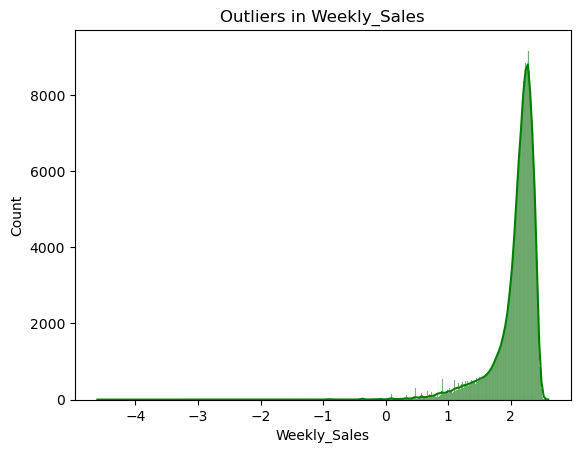

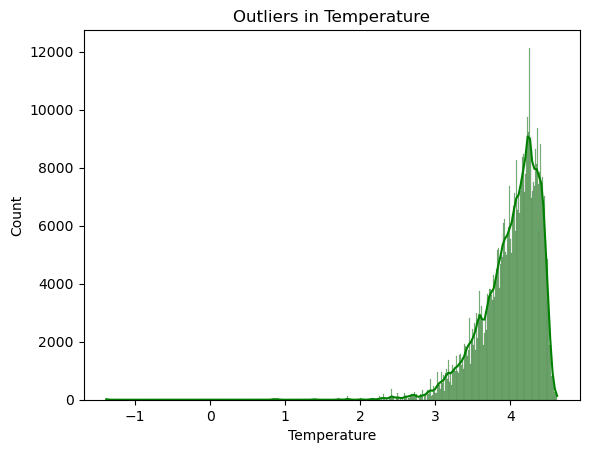

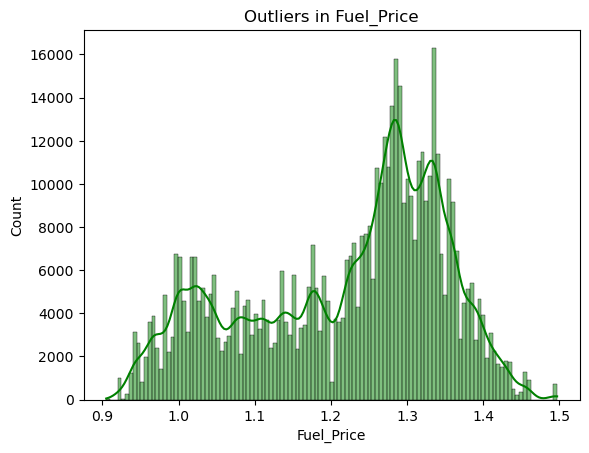

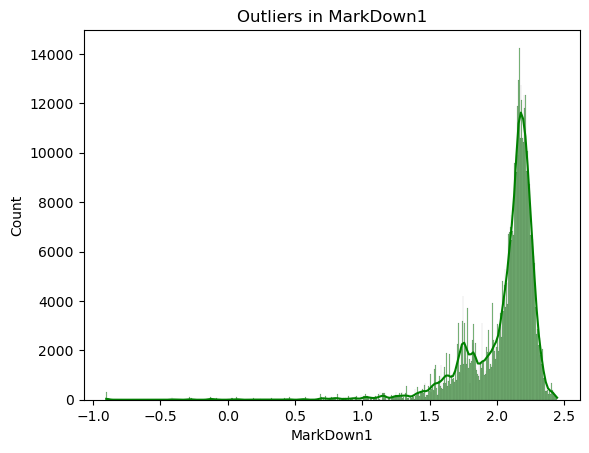

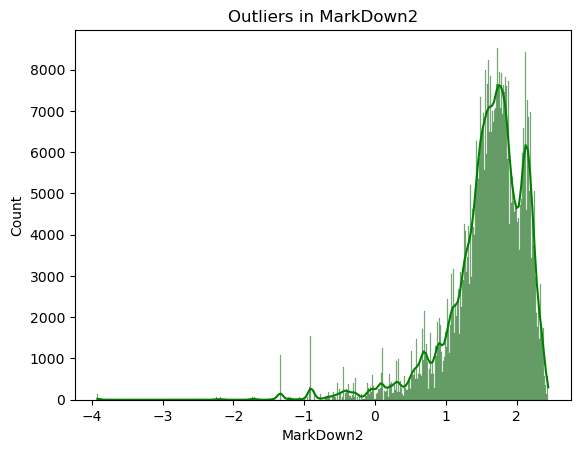

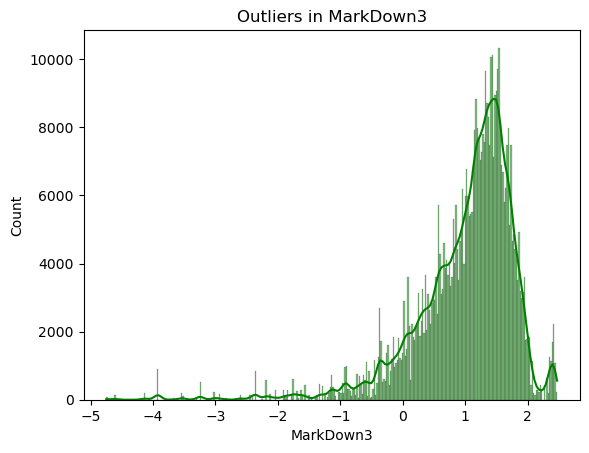

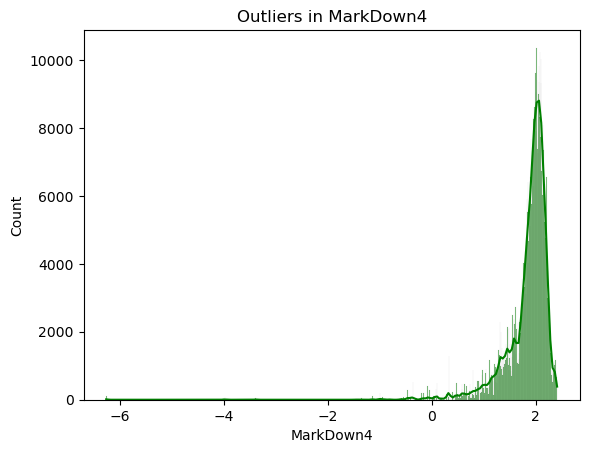

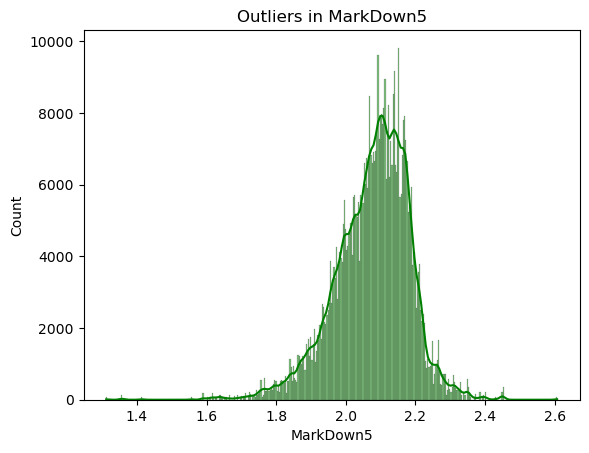

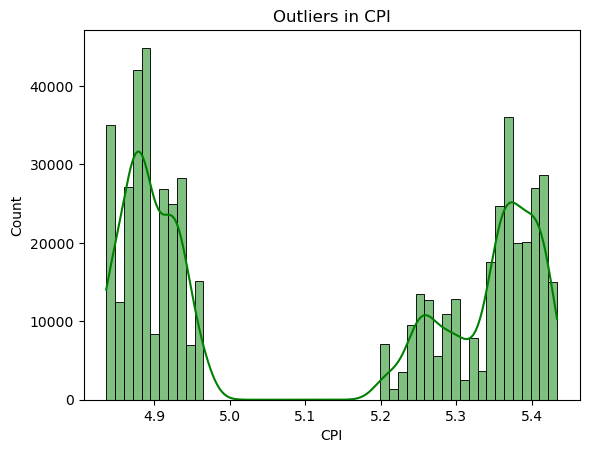

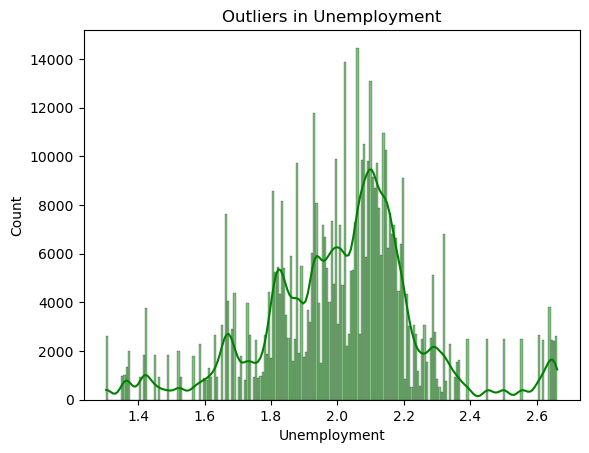

In [29]:
def visuals(columns):
  for i in columns:
    sn.histplot(data=df1,x=i,color='g',kde=True)
    plt.title(f'Outliers in {i}')
    plt.show()
    print()
    print()

visuals(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'])

In [30]:
with open('D:/Project/Retail Sales Final-Project-main/F_regression.pkl', 'rb') as f:
  model = pickle.load(f)

In [31]:
model

RandomForestRegressor()

                                                                      END

In [2]:
import sklearn
print(sklearn.__version__)

1.2.1
